# 🧠 Beginner Project: Handwritten Digit Recognition using CNN (MNIST Dataset)


#### 📦 Tools & Libraries:

- Python
- TensorFlow/Keras
- NumPy, Matplotlib
- Jupyter Notebook (recommended)

#### 📚 Concepts You’ll Learn:

- Image preprocessing
- Building and training a CNN
- Evaluating model performance
- Visualizing training and predictions
- Saving/loading models
- Optional: basic data augmentation

In [ ]:
!pip install matplotlib

# 📦 1. Import Libraries

In [3]:
import tensorflow as tf

hello = tf.constant("Hello from TensorFlow 👋")
print(hello)
print(tf.__version__)

tf.Tensor(b'Hello from TensorFlow \xf0\x9f\x91\x8b', shape=(), dtype=string)
2.13.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 📥 2. Load and Preprocess the Data

In [5]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
# Normalize pixel values

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0


# Optional: One-hot encoding (if using categorical loss)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# 🔧 3. Build the CNN Model

In [7]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9

])

# ⚙️ 4. Compile the Model

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 🏋️ 5. Train the Model

In [9]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 33s 19ms/step - loss: 0.1405 - accuracy: 0.9570 - val_loss: 0.0486 - val_accuracy: 0.9847
Epoch 2/5
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 3/5
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0328 - val_accuracy: 0.9917
Epoch 4/5
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0351 - val_accuracy: 0.9903
Epoch 5/5
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0370 - val_accuracy: 0.9902


# 📈 6. Evaluate the Model

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0299 - accuracy: 0.9908

✅ Test accuracy: 0.9908


# 📊 7. Plot Training History

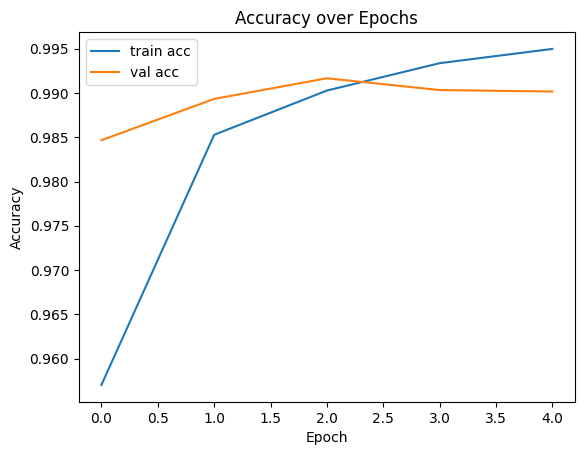

In [11]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 🧪 8. Predict and Visualize

313/313 [==============================] - 3s 8ms/step


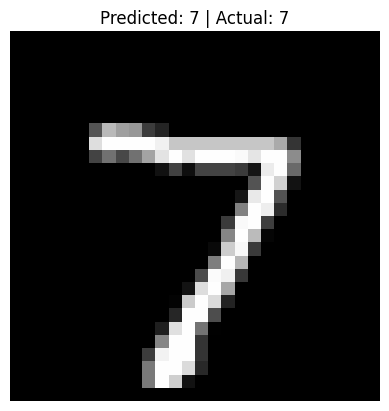

In [12]:
predictions = model.predict(x_test)

def plot_image(index):
    plt.imshow(x_test[index].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])} | Actual: {y_test[index]}")
    plt.axis('off')
    plt.show()
plot_image(0)  # Try different indexes

In [13]:
import os
os.makedirs("images", exist_ok=True)

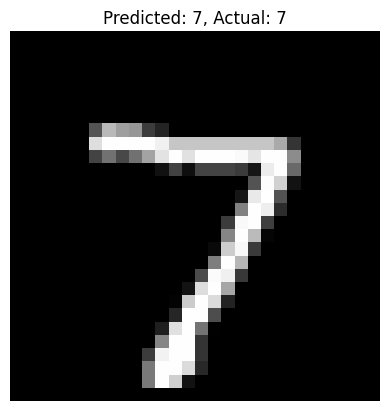

In [14]:
# Save prediction image

plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}")
plt.axis('off')
plt.savefig("images/example.png")

# 💾 9. Save the Model

In [ ]:
model.save("mnist_cnn_model.h5")